In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importation des données :

Article sur les données : http://recentscientific.com/sites/default/files/9272-A-2018.pdf


Site de dépos de données : https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

@relation Absenteeism_at_work  
@attribute ID {31.0, 27.0, 19.0, 30.0, 7.0, 20.0, 24.0, 32.0, 3.0, 33.0, 26.0, 29.0, 18.0, 25.0, 17.0, 14.0, 16.0, 23.0, 2.0, 21.0, 36.0, 15.0, 22.0, 5.0, 12.0, 9.0, 6.0, 34.0, 10.0, 28.0, 13.0, 11.0, 1.0, 4.0, 8.0, 35.0}  
@attribute Reason_for_absence {17.0, 3.0, 15.0, 4.0, 21.0, 2.0, 9.0, 24.0, 18.0, 1.0, 12.0, 5.0, 16.0, 7.0, 27.0, 25.0, 8.0, 10.0, 26.0, 19.0, 28.0, 6.0, 23.0, 22.0, 13.0, 14.0, 11.0, 0.0}  
@attribute Month_of_absence REAL  
@attribute Day_of_the_week {5.0, 2.0, 3.0, 4.0, 6.0}  
@attribute Seasons {4.0, 1.0, 2.0, 3.0}  
@attribute Transportation_expense REAL  
@attribute Distance_from_Residence_to_Work REAL  
@attribute Service_time INTEGER  
@attribute Age INTEGER  
@attribute Work_load_Average/day_ REAL  
@attribute Hit_target REAL  
@attribute Echec disciplinaire {1.0, 0.0}  
@attribute Education REAL  
@attribute fils REAL  
@attribute Drinker {1.0, 0.0}  
@attribute Smoker {1.0, 0.0}  
@attribute Pet REAL  
@attribute Weight REAL  
@attribute Height REAL  
@attribute Body_mass_index REAL  
@attribute Absenteeism_time_in_hours REAL  
   
   
**Explication des données :**
- ID : Est un id répété de chacun des 36 employés étudiés
- Raison de l'absence : Est une catégorie parmi 28 possibilités d'absences
- Mois d'absence** : Est le nombre de mois où il a été comptabilisé une absence 
- Jour de la semaine : Les jours de la semaine de mardi à samedi
- Saison : Les 4 saisons
- Frais de transport : Est le cout entre le lieu de travail et la maison de l'employé
- Distance depuis le lieu de travail : Le nombre de km séparant le travail de la maison de l'employé
- Temps de service : Temps depuis le début l'employé travaillant dans l'entreprise (en année)
- Age : l'age de l'employé au moment de son enregistrement
- Charge de travail par jour : Charge de travail moyen à établir pour une journée
- Objectif atteint : Le pourcentage de travail réussit à étre éffectué parmis sa charge totale de travail sur une journée 
- Scolarité : Catégorie rescençant le niveau d'étude des l'employé
- Fils : Le nombre de fils de l'employé
- est Fumeur : Un booléen notifiant si l'individu fume
- est Buveur : Un booléen notifiant si l'individu boit (sans forcément etre alcoolique
- Animaux : Le nombre d'animaux que possède l'employé
- Poids : Le poids de l'employé
- Taille : La taille de l'employé
- IMC : La masse corporel de l'individu
- Temps d'absence en heure : Le temps d'absence totale eu depuis un moment T*.

*Je n'ai pas connaissance de ce moment mais, je présume que cela est depuis le début de l'enregistrement des données.

**Je choisit volontairement cette explication de cette donnée, il se peut aussi que cette colonne répétorie le nombre de mois d'absence (mais cela manque de sens)

In [0]:
path = "./Absenteeism_at_work.csv"
df = pd.read_csv(path, sep=";")

##### Mise en forme des données 
df.columns = df.columns.str.replace('/', ' per ').str.strip()
df['Social drinker'] = df['Social drinker'].astype('bool')
df['Social smoker'] = df['Social smoker'].astype('bool')
df['Disciplinary failure'] = df['Disciplinary failure'].astype('bool')
df['Seasons'] = df['Seasons'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Day of the week'] = df['Day of the week'].astype('category')
df['Month of absence'] = df['Month of absence'].astype('category')
df['Reason for absence'] = df['Reason for absence'].astype('category')

df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,False,1,2,True,False,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,True,1,1,True,False,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,False,1,0,True,False,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,False,1,2,True,True,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,False,1,2,True,False,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,False,1,2,True,False,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,False,3,1,False,False,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,False,1,1,True,False,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,False,1,2,True,False,2,100,170,35,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason for absence               740 non-null    category
 2   Month of absence                 740 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Average/day            740 non-null    float64 
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    bool    
 12  Educatio

### Commentaire :

On remarque aucune valeur null dans les données. On a 5 colonnes de type catégorie, 3 de type booléen, 13 colonnes de type float et int confondus.  
Cependant la colonne ID est à traiter comme une colonne catégorie car les calculs élémentaires ne sont pas sensés (sauf comptage).

## Visualisation des données abberantes

Ici, j'étudie les variables manquante c'est à dire les variables qui ont été à 0 par défaut.

Dans cette partie, je montre les données concernées et je mets en commentaire ma solution utilisée lors de ma formation des données. 

J'effectue 3 possibilités de formation des données :
- Une première rescençant les solutions suivantes numéros : 1, 2, 3
- Une seconde rescençant les solutions suivantes numéros : 4
- La dernière qui est le dataset sans modification   

In [0]:
df.describe()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,1.018919,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,1.098489,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,1.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,2.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,4.000000,8.000000,108.000000,196.000000,38.000000,120.000000


### Solution 1

In [0]:
df[df['Month of absence']==0]

"""
Explication : 
On peut remarquer qu'il existe des mois d'absences qui sont égales à 0, ainsi cela pourrait être une erreur. 
"""

# Solution utilisée :

# df = df[df['Month of absence'] != 0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
737,4,0,0,3,1,118,14,13,40,271.219,95,False,1,1,True,False,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,False,1,2,True,False,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,95,False,1,1,False,False,1,77,175,25,0


### Solution 2

In [0]:
df[(df['Absenteeism time in hours']==0) & (df['Disciplinary failure']!=1)]

"""
Explication : 
On remarque qu'il y a une raison d'absence mais pas de retard noté
Notre solution est de donner la médiane des temps d'absences pour la raison 27 

"""

## Solution utilisée :
## J'utilise la médiane car la moyenne serait trop influencée par éparpillement des données de cette colonne. (Cf : graphique violon des temps d'absences ci-dessous)

# mediane = np.percentile(dfTemp[dfTemp['Reason for absence']==27][['Absenteeism time in hours']], 50)
# dfTemp.loc[(dfTemp['Reason for absence']==27) & (dfTemp['Absenteeism time in hours']==0),'Absenteeism time in hours'] =  round(mediane)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
134,34,27,1,2,2,118,10,10,37,308.593,95,False,1,0,False,False,0,83,172,28,0
737,4,0,0,3,1,118,14,13,40,271.219,95,False,1,1,True,False,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,False,1,2,True,False,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,95,False,1,1,False,False,1,77,175,25,0


Solution 3

In [0]:
df[df['Absenteeism time in hours']==0]

"""
Explication : 

Les raisons d'absences étant inconnus et aucun temps enregistré, 
nous pouvons utiliser la médiane pour contrecarré ce problème.
"""
      
## Solution utilisée :
## J'utilise la médiane car la moyenne serait trop influencée par éparpillement des données de cette colonne. (Cf : graphique violon des temps d'absences ci-dessous)

# mediane = np.percentile(df[df['Absenteeism time in hours']==0], 50)
# df.loc[(df['Absenteeism time in hours']==0),'Absenteeism time in hours'] = round(mediane)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0,7,3,1,118,13,18,50,239.554,97,True,1,1,True,False,0,98,178,31,0
50,20,0,9,2,4,260,50,11,36,241.476,92,True,1,4,True,False,0,65,168,23,0
51,29,0,9,2,4,225,26,9,28,241.476,92,True,1,1,False,False,2,69,169,24,0
54,11,0,9,3,4,289,36,13,33,241.476,92,True,1,2,True,False,1,90,172,30,0
55,36,0,9,3,4,118,13,18,50,241.476,92,True,1,1,True,False,0,98,178,31,0
58,13,0,9,4,4,369,17,12,31,241.476,92,True,1,3,True,False,0,70,169,25,0
64,36,0,10,4,4,118,13,18,50,253.465,93,True,1,1,True,False,0,98,178,31,0
134,34,27,1,2,2,118,10,10,37,308.593,95,False,1,0,False,False,0,83,172,28,0
203,2,0,4,2,3,235,29,12,48,326.452,96,True,1,1,False,True,5,88,163,33,0
213,7,0,5,4,3,279,5,14,39,378.884,92,True,1,2,True,True,0,68,168,24,0


Solution 4 :

In [0]:
df[df['Absenteeism time in hours']==0]

"""
Explication : 

Les raisons d'absences étant inconnus peuvent faussés le résultat 
car les raisons inconnues peuvent-etre issu d'autres raisons possible,
amenant un phénomène aléatoire aux données et une difficulté de prédiction supplémentaire.
Ainsi, supprimer ces lignes, enlève ce doute.
"""
      
## Solution utilisée :

# df = df[df['Absenteeism time in hours']=!0]

Graphique sous forme violon de répartition des temps d'absences.

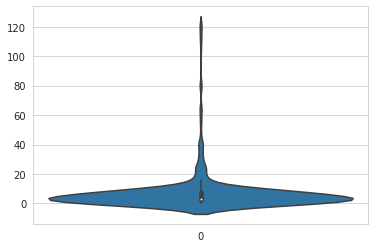

In [0]:
features = df.columns 
sns.set_style('whitegrid')

## Analyse pour la répartition du temps d'absence
# Pour voir son évolution et ainsi permet sa dispersion en classe équiprobable.

sns.violinplot(data=df[features[-1]])

On remarque que la médiane se situe vers 5 les répartitions des données se feront majoritairement
sur des petites classes pour la première moitié et sera plus distendu par la suite.


# Analyse Bivarié


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


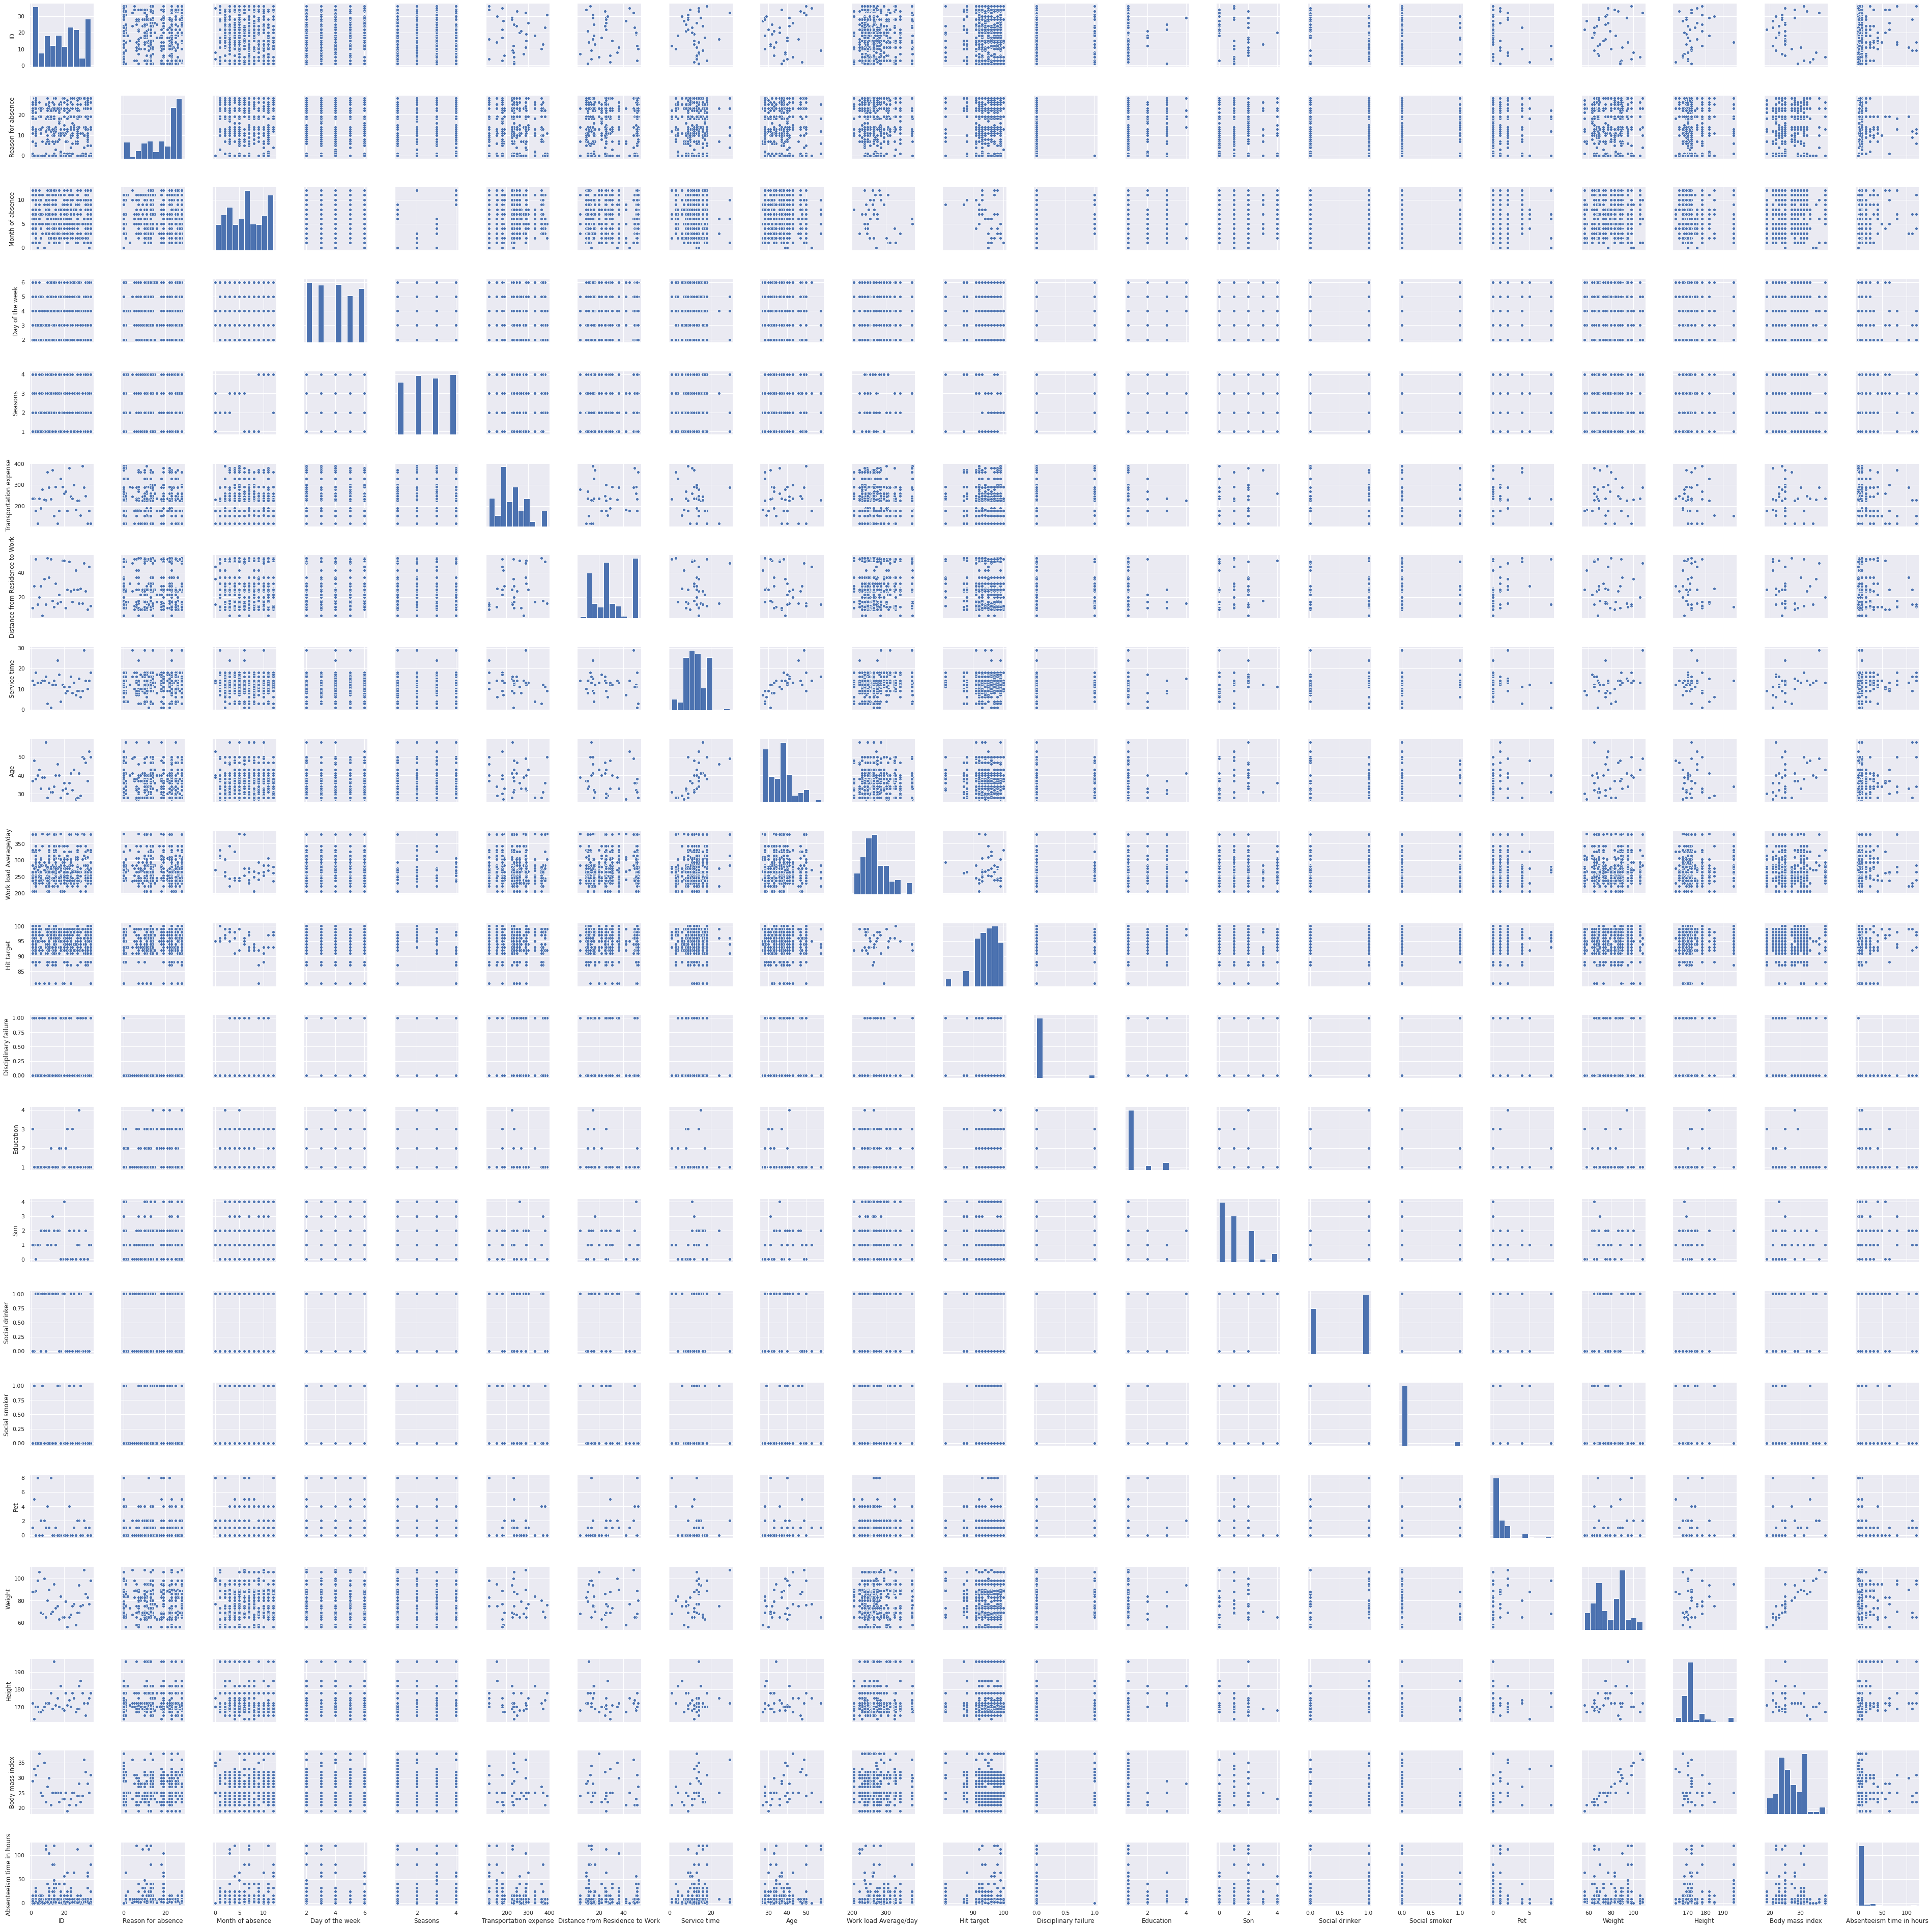

In [0]:
import seaborn as sns
sns.set()
sns.pairplot(df);

### Remarque :

Nous ne parlerons que des graphiques bivariés..

On peut remarque des formations linéaires pour les graphiques suivant :
- Age/temps de services
- Poids/IMC
- IMC/ temps de service

Cependant, il y a de nombreux graphiques dont l'information semble trop éparpilliée

# Analyse de la corrélation 

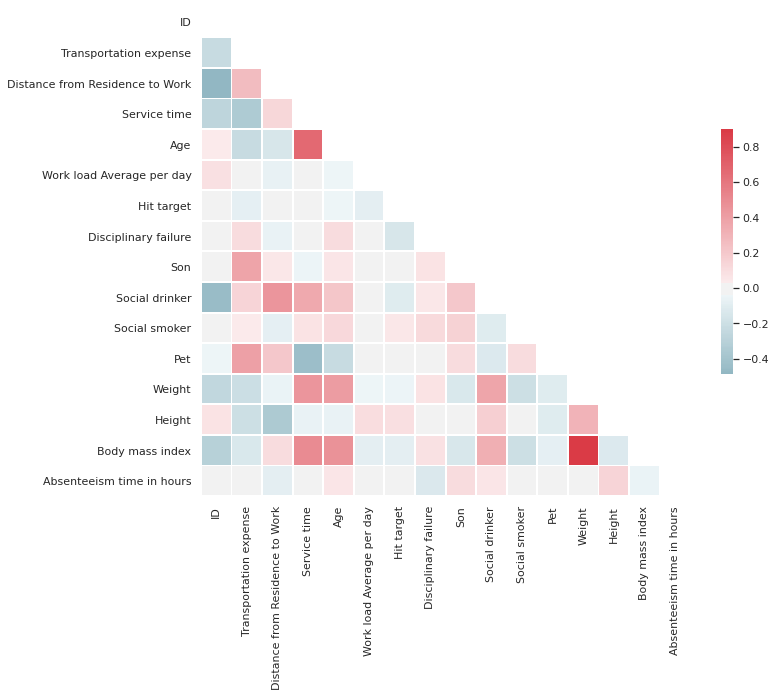

In [0]:
from string import ascii_letters
sns.set(style="white")


corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, square=True, linewidths=.9, cbar_kws={"shrink": .5})

On remarque que notre variable cible (Temps d'absence) n'a que peu de corrélation avec les autres variables. Ce qui nous fait tendre à dire que la liaison des données doivent etre implicites, nécessitant une fonction non linéaire.

Les liaisons majeures entrent les variables sont surtout situées au niveau du corps de l'individu (poids, IMC, taille). Mais également par le temps de service, le fait de boir de l'alcool et l'age. Cependant ces dernières variables sont beaucoup moins corrélées (~ 0.5) face à l'IMC et le poids, par exemple. 
Ainsi, il y a peu de corrélation entre les données en terme général.

# ACP

In [0]:
from sklearn.preprocessing import StandardScaler

X = df.loc[:, features[:len(features)-1]].values
y = df.loc[:, [features[-1]]].values

X = StandardScaler().fit_transform(X)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Axe 1', 'Axe 2'])

finalDf = pd.concat([principalDf, df[features[-1]]], axis = 1)

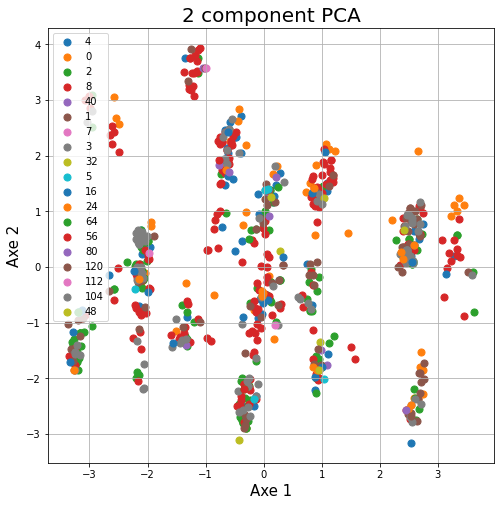

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Axe 1', fontsize = 15)
ax.set_ylabel('Axe 2', fontsize = 15)
ax.set_title('APC absentiéisme au travail', fontsize = 20)
targets = df[features[-1]].unique().tolist()
for target in targets:  
    indicesToKeep = finalDf[features[-1]] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Axe 1']
               , finalDf.loc[indicesToKeep, 'Axe 2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
pca.explained_variance_ratio_

array([0.1721888 , 0.11983547])

Avec 17 % et 12 % respectivement pour le premier et le second axe cela montre que le taux d’information est éparpillée parmi les différents axes suivant, ne donnant que 29 % de l’information, ce qui est peu.

## Conclusion

Je choisis d'utiliser un RN sklearn, car la fonction d'apprentissage semble à non linéaire et que le peu de données laisse la possibilité d'utilisé ce type de modèle. De plus je choisit d'effectuer une tache classification car les données étant peu corrélé avec la variable cible (temps d'absence), ne fournira pas assez d'information pour effectuer une tâche de regression. 